In [1]:
%matplotlib notebook
#%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os, shutil, glob, pathlib
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.mixture import GaussianMixture
from prody import *

# A little preparation

Let's define a local folder where (gzipped) PDB files will be stored. 

In [2]:
project_name   = 'SiaP' # name of the directory under data/
overwrite      = False  # set to True if you want to overwrite previous attempt.

In [3]:
# no need to edit this cell
current_dir = pathlib.Path(os.getcwd())  
output_dir = current_dir / 'data' / project_name

try:
    if overwrite:
        print(f'{str(output_dir)} is about to be overwritten')
        shutil.rmtree(output_dir)
except:
    print(f'{str(output_dir)} is about to be created')

output_dir.mkdir(parents=True, exist_ok=True)

print(f'Will output to: {output_dir}')

pathPDBFolder(folder=output_dir)

Will output to: /Users/fpoitevi/Projects/prody-decoys/notebooks/data/SiaP


*Note:* upon dowload files are also stored in the current directory. Let's write a little clean-up function to correct this unwanted behavior

In [4]:
# no need to edit this cell
def clean_up():
    print(f'>>> Content of current directory before clean up:\n {os.listdir("./")}')
    pdb_list = glob.glob('*.pdb')
    for pdb in pdb_list:
        try:
            os.remove(pdb)
        except:
            print(f'Error while deleting {pdb}')
    print(f'>>> Content of current directory before clean up:\n {os.listdir("./")}')

In [5]:
# no need to edit this cell
clean_up()

>>> Content of current directory before clean up:
 ['4o7m_aligned.pdb', '4o94_aligned.pdb', '4nx1_aligned.pdb', '4n8g_aligned.pdb', 'Decoys.ipynb', '2vpn_aligned.pdb', '4mmp_aligned.pdb', '5im2_aligned.pdb', '4xeq_aligned.pdb', '3gyy_aligned.pdb', '4oan_aligned.pdb', 'NOLB.ipynb', '4pfr_aligned.pdb', '4xfe_aligned.pdb', '2wx9_aligned.pdb', 'Untitled.ipynb', '4pf6_aligned.pdb', '4ng7_aligned.pdb', '4nhb_aligned.pdb', '4x8r_aligned.pdb', '2xwk_aligned.pdb', '4ovs_aligned.pdb', '4pfb_aligned.pdb', '4ngu_aligned.pdb', '3fxb_aligned.pdb', '4nn3_aligned.pdb', '4p47_aligned.pdb', '5i7i_aligned.pdb', '4pgn_aligned.pdb', '2cex_aligned.pdb', '2wyk_aligned.pdb', '4nap_aligned.pdb', '4x04_aligned.pdb', '4pbq_aligned.pdb', '3b50_aligned.pdb', '2hpg_aligned.pdb', '4n6k_aligned.pdb', '4nf0_aligned.pdb', '2xwv_aligned.pdb', '4ovt_aligned.pdb', '4p9k_aligned.pdb', '4o8m_aligned.pdb', '2xwi_aligned.pdb', '4n8y_aligned.pdb', '4ovq_aligned.pdb', '4mco_aligned.pdb', '4nq8_aligned.pdb', '4pf8_aligned.pdb', 

# Statistical analysis of structures deposited in the PDB
In the following, we download a reference structure, and retrieve all others that have a similar sequence

## Reference structure

We consider 2CEX as our reference PDB file

In [6]:
ref_pdb = '2cex'

Let's download it from the Protein Data Bank

In [7]:
ref_prot = parsePDB(ref_pdb)

Let's get some insight about its composition

In [8]:
ref_hv = ref_prot.getHierView()
ref_hv

<HierView: AtomGroup 2cex (4 chains, 1679 residues)>

Let's retrieve the sequence of the first chain

In [9]:
sequence = ref_hv['A'].getSequence()
sequence

'DYDLKFGMNAGTSSNEYKAAEMFAKEVKEKSQGKIEISLYPSSQLGDDRAMLKQLKDGSLDFTFAESARFQLFYPEAAVFALPYVISNYNVAQKALFDTEFGKDLIKKMDKDLGVTLLSQAYNGTRQTTSNRAINSIADMKGLKLRVPNAATNLAYAKYVGASPTPMAFSEVYLALQTNAVDGQENPLAAVQAQKFYEVQKFLAMTNHILNDQLYLVSNETYKELPEDLQKVVKDAAENAAKYHTKLFVDGEKDLVTFFEKQGVKITHPDLVPFKESMKPYYAEFVKQTGQKGESALKQIEAIN'

If you have installed `py3Dmol` in your environment, you can interact with the molecule:

In [10]:
try:
    import py3Dmol
    view = showProtein(ref_hv['A'], draw='3dmol')
    view
except:
    showProtein(ref_hv['A'])

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Downloading the whole ensemble

Let's find all IDs in the Protein Data Bank that have a similar sequence.

Since we only need to BLAST once, we set `blast` to False if we already did it

In [16]:
blast = True

In [17]:
if blast:
    blast_record = blastPDB(sequence)
    pdbids = blast_record.getHits()
    print(f'>>> List of PDB hits:\n {pdbids.keys()}')
else:
    pdbids = glob.glob(str(output_dir)+'/*.pdb.gz')
structures = parsePDB(*pdbids, chain='A', compressed=False)

>>> List of PDB hits:
 dict_keys(['2xwv', '2v4c', '2cex', '2wyk', '3b50', '2xxk', '2xwi', '2wx9', '2xwo', '2xwk', '4mmp', '4mnp', '4mag', '5ltc', '4pf6', '4oan', '4ngu', '4p9k', '4pdd', '4ovs', '4nq8', '4p8b', '4o8m', '4nn3', '4x8r', '4p47', '4pdh', '4o94', '4nhb', '4pc9', '4mx6', '4p1l', '4pbq', '3fxb', '2hpg', '4paf', '4pfr', '4n8y', '4nx1', '4pf8', '4n8g', '5im2', '5i7i', '4p1e', '4ovt', '3gyy', '2vpn', '4ovr', '4mij', '4mhf', '4n15', '4ln5', '4o7m', '4n6k', '4ovq', '5izz', '4n91', '4xeq', '4ng7', '4x04', '4pfi', '4pgn', '4nap', '4pfb', '4n6d', '4nf0', '4xfe', '4mco'])


@> Retrieving 4mcoA... [ 98%] 1s 

In [18]:
clean_up()

>>> Content of current directory before clean up:
 ['4nhb.pdb', '4ovs.pdb', '4ovr.pdb', '4p8b.pdb', '4p47.pdb', '4pbq.pdb', '4oan.pdb', '2wx9.pdb', 'Decoys.ipynb', '4o94.pdb', '2wyk.pdb', '4ovq.pdb', '2cex.pdb', '4o7m.pdb', '4mnp.pdb', '4ovt.pdb', 'NOLB.ipynb', '3gyy.pdb', '5ltc.pdb', '4pf8.pdb', '2xwo.pdb', 'Untitled.ipynb', '4ln5.pdb', '4n8g.pdb', '4p1l.pdb', '3b50.pdb', '4xfe.pdb', '4x04.pdb', '4pdd.pdb', '4n6k.pdb', '2xwi.pdb', '5izz.pdb', '5im2.pdb', '2hpg.pdb', '4pfi.pdb', '4n91.pdb', '2v4c.pdb', '4mhf.pdb', '4nn3.pdb', '2xwk.pdb', '4pgn.pdb', '4nap.pdb', '4n6d.pdb', '4p1e.pdb', '4n8y.pdb', '4nx1.pdb', '4pfr.pdb', '2xxk.pdb', '3fxb.pdb', '5i7i.pdb', '2xwv.pdb', '4pf6.pdb', '4pdh.pdb', '4pfb.pdb', '4xeq.pdb', '4mij.pdb', '2vpn.pdb', '4n15.pdb', '.ipynb_checkpoints', '4o8m.pdb', '4mag.pdb', '4mco.pdb', 'PDB - download and cluster.ipynb', '4mmp.pdb', 'data', '4nf0.pdb', '4ngu.pdb', '4paf.pdb', '4nq8.pdb', '4pc9.pdb', '4p9k.pdb', '4ng7.pdb', '4x8r.pdb', '4mx6.pdb']
>>> Content of cur

Homogenize and align ensemble

In [20]:
ensemble = buildPDBEnsemble(structures, pwalign='ce', ref=2, title='SiaP')
#ensemble.superpose()
alignPDBEnsemble(ensemble)
writePDB(f'{output_dir}/ensemble.pdb', ensemble)

@> Mapping 4mcoA to the reference... [ 98%] 1s

'/Users/fpoitevi/Projects/prody-decoys/notebooks/data/SiaP/ensemble.pdb'

Let's visualize the ensemble

In [21]:
color_series = px.colors.qualitative.Alphabet
#
fig = go.Figure()
for i in np.arange(ensemble.getCoordsets().shape[0]):
    fig.add_trace(
        go.Scatter3d(
                x=ensemble.getCoordsets()[i,:,0], 
                y=ensemble.getCoordsets()[i,:,1],
                z=ensemble.getCoordsets()[i,:,2],
                marker=dict(
                    size=0,
                    color=color_series[i%len(color_series)],
                    opacity=0.8
                ),
                line=dict(
                    color=color_series[i%len(color_series)],
                    width=2
                )
            )
    )
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## Statistical analysis
We perform a Principal Component Analysis on the cartesian coordinates (features) of the ensemble (samples).

In [22]:
pca = PCA('SiaP')
pca.performSVD(ensemble)

Examine the eigenvalues and how much of the variability they each explain

<IPython.core.display.Javascript object>


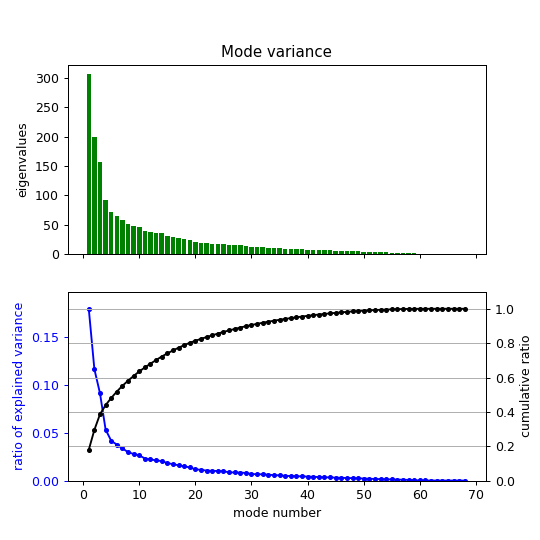

In [23]:
fig, axes = plt.subplots(nrows=2,ncols=1, sharex=True, figsize=(6,6), dpi=90)
# Eigenvalues
ax = axes[0]
ax.set_title('Mode variance')
ax.set_ylabel('eigenvalues')
x = np.arange(1,len(pca.getEigvals())+1)
ax.bar(x, pca.getEigvals(), color='green')
# Variance (square of eigenvalue)
### ratio
ax = axes[1]
ratio = pca.getVariances()/sum(pca.getVariances())
ax.set_ylim((0,1.1*max(ratio)))
ax.set_xlabel('mode number')
ax.yaxis.label.set_color('blue')
ax.tick_params(axis='y', colors='blue')
ax.set_ylabel('ratio of explained variance')
ax.plot(x, ratio, 'b.-')
### cumulative ratio
ax2 = ax.twinx()
ax2.set_ylim((0,1.1))
ax2.set_ylabel('cumulative ratio')
ax2.plot(x, np.cumsum(pca.getVariances()/sum(pca.getVariances())), 'k.-')
ax2.grid()
plt.show()

The 3 first modes stand out, explained more than 40% of the variability in the dataset. Let's focus on those first.

### Reduced dimension space
We can now project the ensemble in the space of the first 3 principal components and visualize them there. 

In [24]:
number_of_components = 3

In [25]:
projections = calcProjection(ensemble, pca)
df= pd.DataFrame(data=projections[:,:number_of_components])
labels = np.array(ensemble.getLabels())
df['PDB IDs'] = labels

<IPython.core.display.Javascript object>


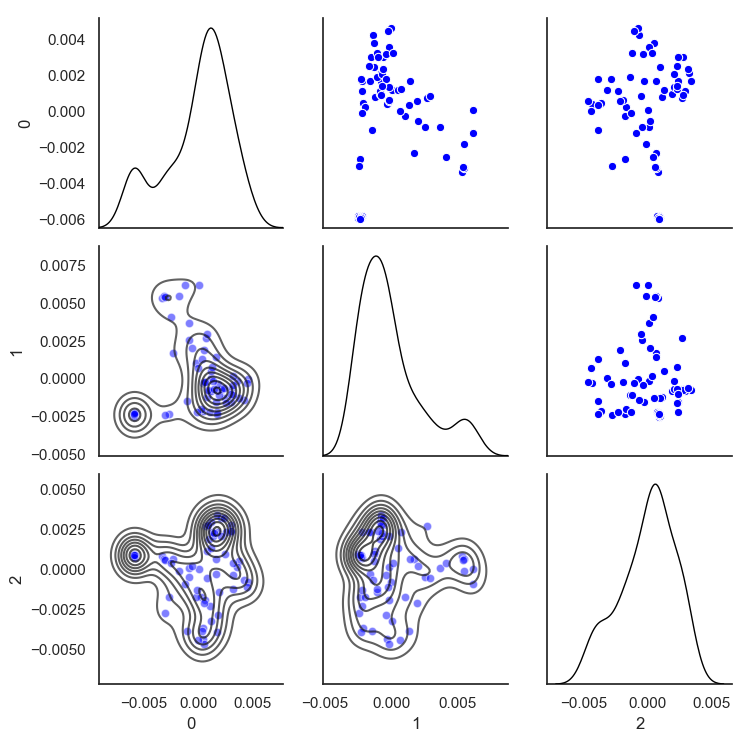

In [26]:
sns.set(style="white")
g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot, color='blue')
g.map_lower(sns.kdeplot, alpha=0.7, color='black')
g.map_lower(sns.scatterplot, alpha=0.5, color='blue')
g.map_diag(sns.kdeplot, lw=1, color='black')
plt.tight_layout()

### Clustering
Let's fit a mixture of Gaussian to these distributions. The number of Gaussians will be chosen based on the evaluation of the Bayesian Information Criterion.

In [27]:
def scan_gmm(V,n_components=10):
    """
    """
    n_components_range = range(1, n_components+1)
    lowest_bic = np.infty
    bic = []
    for i_components in n_components_range:
        gmm = GaussianMixture(n_components=i_components)
        gmm.fit(V)
        bic.append(gmm.bic(V))
        print(f'[{i_components}/{n_components}] BIC = {bic[-1]:.02f}')
        #print(" BIC(",i_components,") = ",bic[-1],end="")
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
    bic = np.array(bic)
    return best_gmm,bic

In [40]:
gmm, bic = scan_gmm(projections[:,:3])

[1/10] BIC = -1833.96
[2/10] BIC = -1877.47
[3/10] BIC = -1875.04
[4/10] BIC = -1851.94
[5/10] BIC = -1814.72
[6/10] BIC = -1773.95
[7/10] BIC = -1737.15
[8/10] BIC = -1693.79
[9/10] BIC = -1652.02
[10/10] BIC = -1610.95


<IPython.core.display.Javascript object>


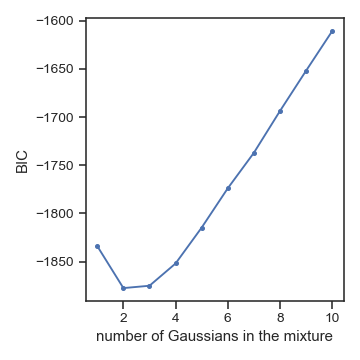

In [41]:
fig = plt.figure(figsize=(4,4),dpi=90)
plt.xlabel('number of Gaussians in the mixture')
plt.ylabel('BIC')
plt.plot(np.arange(1,len(bic)+1), bic, '.-')
plt.tight_layout()
plt.show()

In [30]:
def assign_gmm(V,n_components=2):
    """
    """
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(V)
    assignment = gmm.predict(V)
    index = assignment_to_index(assignment, n_components)
    return assignment,index
def assignment_to_index(assignment, nbins, istart=0):
    index = []
    for i in np.arange(istart,nbins):
        index.append(np.ma.where(assignment == i))
        print(". component ",i," has ",index[-1][0].shape[0]," particles")
    return index

We see that the BIC is minimum for 2 or 3 Gaussians. We can thus pick one of there mixture models and assign their cluster to each structure, and visualize the in the reduced dimensionality space.

In [42]:
n_gmm=3

In [43]:
assignment, index = assign_gmm(projections[:,:3], n_components=n_gmm)
df['assignment'] = assignment
df['assignment'] = df['assignment'].astype('str')

. component  0  has  32  particles
. component  1  has  22  particles
. component  2  has  14  particles


<IPython.core.display.Javascript object>


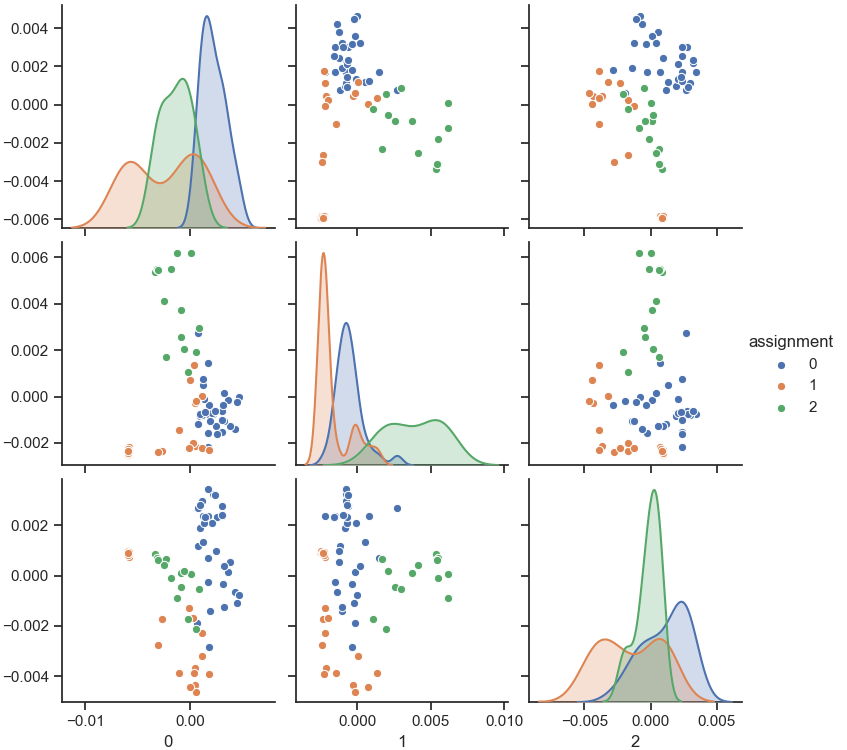

In [44]:
sns.set(style="ticks")
sns.pairplot(df, hue="assignment")

Picking one element from each cluster, we can also compare how they look in the original high-dimensional space:

In [54]:
color_series = px.colors.qualitative.Alphabet
#
fig = go.Figure()
for i in np.arange(n_gmm):
    print(f'>>> Displaying {labels[index[i][0][0]]}')
    fig.add_trace(
        go.Scatter3d(
                x=ensemble.getCoordsets()[index[i][0][0],:,0], 
                y=ensemble.getCoordsets()[index[i][0][0],:,1],
                z=ensemble.getCoordsets()[index[i][0][0],:,2],
                marker=dict(
                    size=0,
                    color=color_series[index[i][0][0]%len(color_series)],
                    opacity=0.8
                ),
                line=dict(
                    color=color_series[index[i][0][0]%len(color_series)],
                    width=5
                )
            )
    )
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

>>> Displaying 4oanA
>>> Displaying 2xwvA
>>> Displaying 2cexA


Here we just picked the first ones in each group, but we could also look for centroids, etc.